### Neural Network Data Science Project
Completed the project from the Pieran Data Udemy Course titled "python for data science and machine learning bootcamp". I conducted this project on my own and just checked my solution with the course's solution after I finished training and evaluating my model. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import explained_variance_score
import re
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [2]:
#classification problem - predicting loan_status column
df = pd.read_csv('C:/Users/danie/OneDrive/Desktop/Desktop/Booz Allen Hamilton/Data Science/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
#have some nulls in the employment title and employment length both of these, are object variables... 

##### Going to look at the categorical variables first for EDA and data cleaning, to see what looks like it matters, so that can help me drop what I don't need...

My main plan is to assess the categorical variables to see if the percentage of "fully paid" or "charged off" varies across each variable. I don't think I need to keep every single one of these in to create a good model, so based on which features seem to have the biggest gaps in their percentages I will determine if I want to keep the feature or not. 

In [6]:
cat_only = df.select_dtypes(['object'])

In [7]:
cat_only = pd.DataFrame(cat_only)

In [8]:
cat_only = cat_only.merge(df[['loan_status']], how='left', left_index=True, right_index=True)

In [9]:
cat_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   emp_title            373103 non-null  object
 4   emp_length           377729 non-null  object
 5   home_ownership       396030 non-null  object
 6   verification_status  396030 non-null  object
 7   issue_d              396030 non-null  object
 8   loan_status_x        396030 non-null  object
 9   purpose              396030 non-null  object
 10  title                394274 non-null  object
 11  earliest_cr_line     396030 non-null  object
 12  initial_list_status  396030 non-null  object
 13  application_type     396030 non-null  object
 14  address              396030 non-null  object
 15  loan_status_y        396030 non-nu

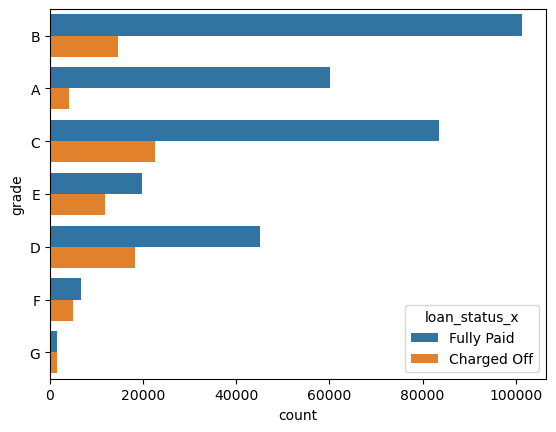

In [10]:
sns.countplot(data=cat_only, y='grade', hue='loan_status_x', orient='v')
plt.show()

In [11]:
cat_only['address'].value_counts()

address
USCGC Smith\nFPO AE 70466                           8
USS Johnson\nFPO AE 48052                           8
USNS Johnson\nFPO AE 05113                          8
USS Smith\nFPO AP 70466                             8
USNS Johnson\nFPO AP 48052                          7
                                                   ..
455 Tricia Cove\nAustinbury, FL 00813               1
7776 Flores Fall\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\nMadisonstad, VT 05113    1
787 Michelle Causeway\nBriannaton, AR 48052         1
Name: count, Length: 393700, dtype: int64

In [12]:
print(cat_only['address'].nunique()) #gonna drop, that seems too noisy to do much of anything with... could get the zip code out, and then see if that
#is more helpful...

393700


In [13]:
cat_only.drop(columns='address',inplace=True)

In [14]:
cat_only['emp_title'].value_counts() #this is another messy column that, in real life I would probably clean to use, but for this
#project, it will get dropped. 

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [15]:
cat_only['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

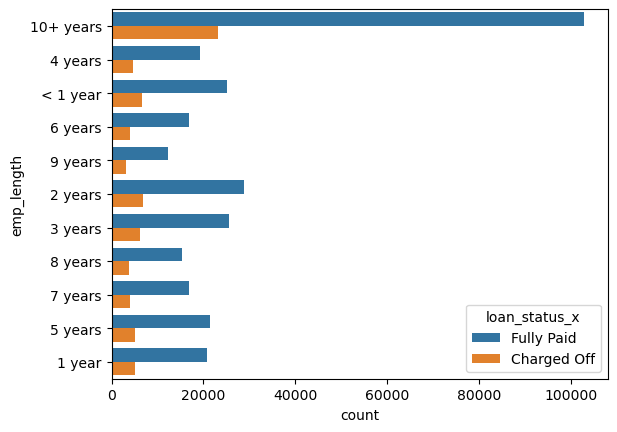

In [16]:
sns.countplot(data=cat_only, y='emp_length', hue='loan_status_x', orient='v')
plt.show()

In [17]:
cat_only.loc[cat_only['emp_length'] != '10+ years', 'emp_length'] = 'Under 10 Years'

In [18]:
cat_only['emp_length'].value_counts()

emp_length
Under 10 Years    269989
10+ years         126041
Name: count, dtype: int64

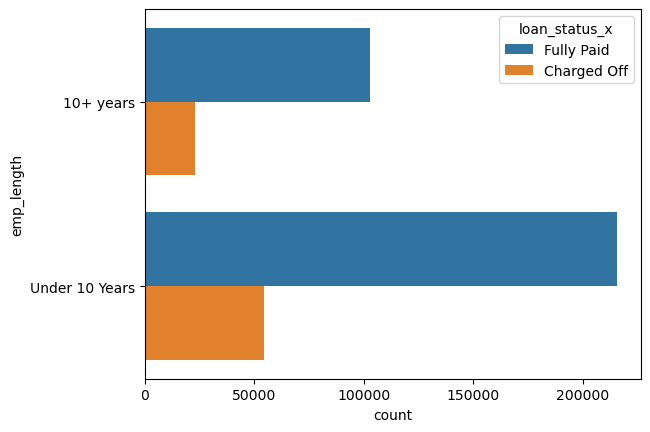

In [19]:
sns.countplot(data=cat_only, y='emp_length', hue='loan_status_x', orient='v')
plt.show()

In [20]:
fully_paid_over_10 = cat_only.loc[(cat_only['emp_length'] == '10+ years') &
                    (cat_only['loan_status_x'] == 'Fully Paid')]['emp_length'].count()
charged_off_over_10 = cat_only.loc[(cat_only['emp_length'] == '10+ years') &
                    (cat_only['loan_status_x'] == 'Charged Off')]['emp_length'].count()
print(charged_off_over_10/fully_paid_over_10)

0.2257697469511602


In [21]:
fully_paid_under_10 = cat_only.loc[(cat_only['emp_length'] == 'Under 10 Years') &
                    (cat_only['loan_status_x'] == 'Fully Paid')]['emp_length'].count()
charged_off_under_10 = cat_only.loc[(cat_only['emp_length'] == 'Under 10 Years') &
                    (cat_only['loan_status_x'] == 'Charged Off')]['emp_length'].count()
print(charged_off_under_10/fully_paid_under_10)

0.2526689896117032


Given that the percentages do not vary a lot over our person's employment length, I don't think this is a very salient variable for the model. Similar story seemed to be present before reducing granularity of this column.

In [22]:
cat_only.drop(columns='emp_length',inplace=True)

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
cat_only['title'] = cat_only['title'].fillna('None')

In [25]:
#going to change the debt consolidation entries to match each other
cat_only['title'] = cat_only['title'].str.lower()

cat_only.loc[cat_only['title'].str.contains('consolidat'),'title']='Debt Consolidation'

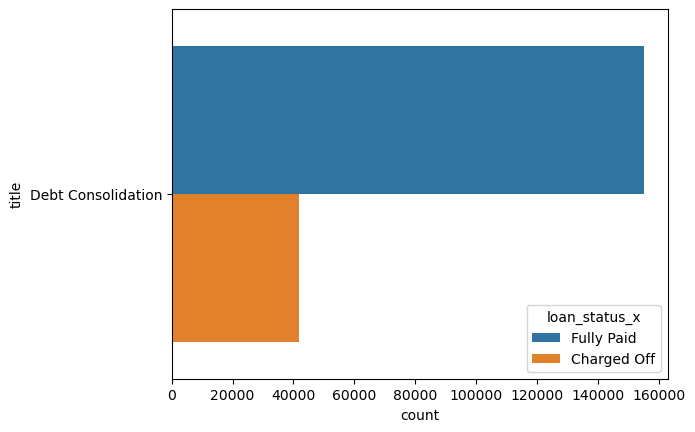

In [26]:
sns.countplot(data=cat_only.loc[cat_only['title']=='Debt Consolidation'], y='title', hue='loan_status_x', orient='v')
plt.show()

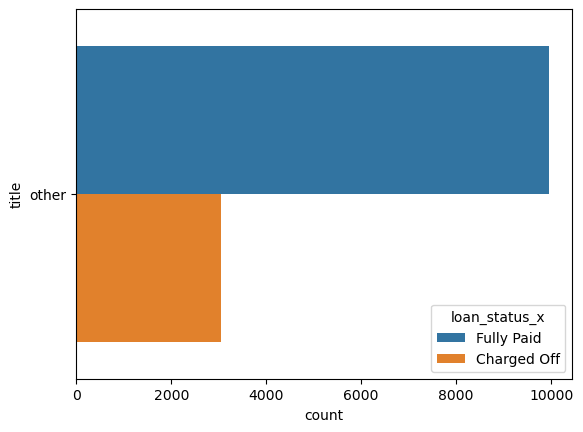

In [27]:
sns.countplot(data=cat_only.loc[cat_only['title']=='other'], y='title', hue='loan_status_x', orient='v')
plt.show()

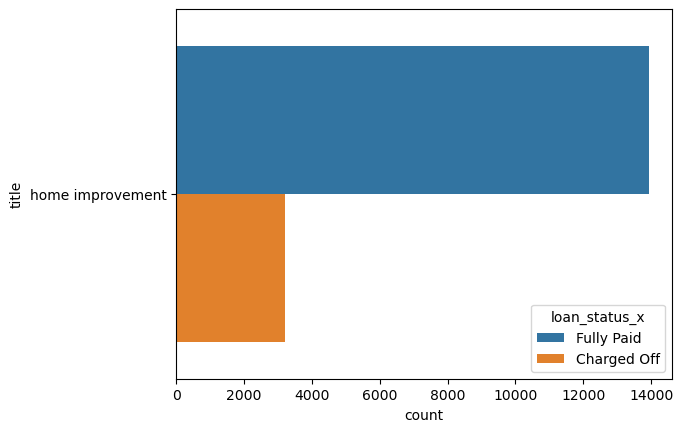

In [28]:
sns.countplot(data=cat_only.loc[cat_only['title']=='home improvement'], y='title', hue='loan_status_x', orient='v')
plt.show()

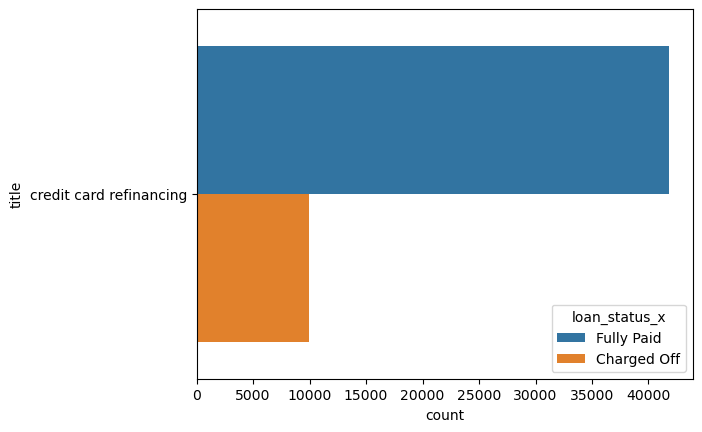

In [29]:
sns.countplot(data=cat_only.loc[cat_only['title']=='credit card refinancing'], y='title', hue='loan_status_x', orient='v')
plt.show()

In [30]:
fully_paid_over_cc = cat_only.loc[(cat_only['title'] == 'credit card refinancing') &
                    (cat_only['loan_status_x'] == 'Fully Paid')]['title'].count()
charged_off_over_cc = cat_only.loc[(cat_only['title'] == 'credit card refinancing') &
                    (cat_only['loan_status_x'] == 'Charged Off')]['title'].count()
print(charged_off_over_cc/fully_paid_over_cc)

0.2381282578547176


In [31]:
fully_paid_over_cc = cat_only.loc[(cat_only['title'] == 'Debt Consolidation') &
                    (cat_only['loan_status_x'] == 'Fully Paid')]['title'].count()
charged_off_over_cc = cat_only.loc[(cat_only['title'] == 'Debt Consolidation') &
                    (cat_only['loan_status_x'] == 'Charged Off')]['title'].count()
print(charged_off_over_cc/fully_paid_over_cc)

0.27009217569421634


Given counts, I am going to change this column to "Debt Consolidation" or "Not Debt Consolidation" and see if we get more differentiated percentages, but right now, this field does not look very helpful. 

In [32]:
cat_only.loc[~cat_only['title'].str.contains('Consolidat'),'title']='General Purpose'

In [33]:
cat_only['title'].value_counts()

title
General Purpose       198852
Debt Consolidation    197178
Name: count, dtype: int64

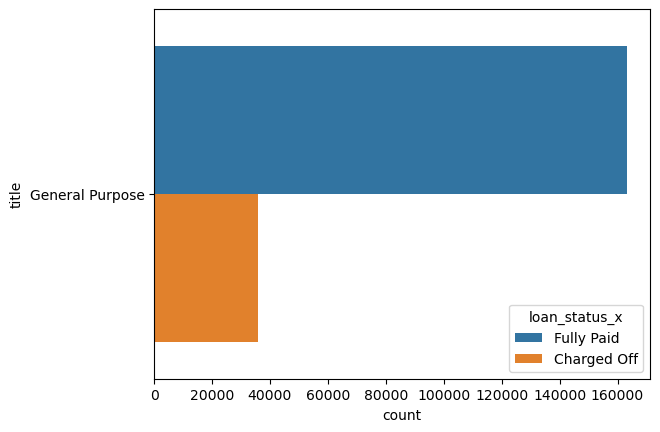

In [34]:
sns.countplot(data=cat_only.loc[cat_only['title']=='General Purpose'], y='title', hue='loan_status_x', orient='v')
plt.show()

In [35]:
fully_paid_over_cc = cat_only.loc[(cat_only['title'] == 'General Purpose') &
                    (cat_only['loan_status_x'] == 'Fully Paid')]['title'].count()
charged_off_over_cc = cat_only.loc[(cat_only['title'] == 'General Purpose') &
                    (cat_only['loan_status_x'] == 'Charged Off')]['title'].count()
print(charged_off_over_cc/fully_paid_over_cc)

0.21912819569615596


This is now a 5% swing, so, maybe worth keeping in? We will keep it in and see what happens.

In [36]:
cat_only['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

Ok, this column is basically redundant with the title column. Do a quick visualization, then drop this one, since I already cleaned the other one. 

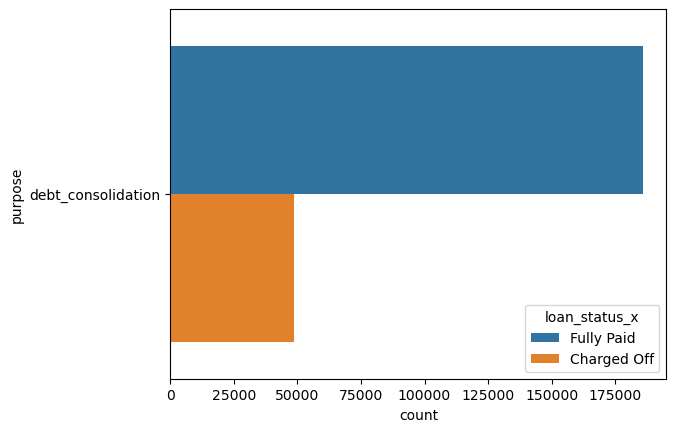

In [37]:
sns.countplot(data=cat_only.loc[cat_only['purpose']=='debt_consolidation'], y='purpose', hue='loan_status_x', orient='v')
plt.show()

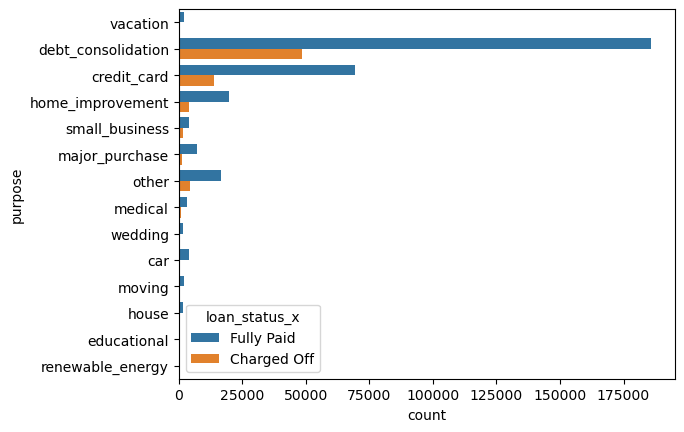

In [38]:
sns.countplot(data=cat_only, y='purpose', hue='loan_status_x', orient='v')
plt.show()

In [39]:
cat_only.drop(columns='purpose',inplace=True)

In [40]:
cat_only['issue_d'].value_counts()

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
Jul-2015    10270
Oct-2013    10047
Jan-2014     9705
Apr-2015     9470
Sep-2013     9179
Aug-2013     9112
Apr-2014     9020
Nov-2014     8858
May-2014     8840
Jul-2013     8631
Oct-2015     8401
May-2015     8325
Mar-2014     8108
Jun-2013     7947
Aug-2014     7860
Feb-2014     7624
Jun-2014     7610
May-2013     7567
Mar-2015     7268
Feb-2015     7167
Aug-2015     7153
Apr-2013     6970
Jun-2015     6844
Dec-2015     6407
Mar-2013     6187
Mar-2016     5945
Nov-2015     5835
Feb-2013     5693
Sep-2015     5419
Jan-2013     5215
Nov-2012     4910
Oct-2012     4833
Sep-2012     4707
Dec-2012     4571
Feb-2016     4336
Sep-2014     4293
Aug-2012     4220
Jan-2016     4133
Jul-2012     3576
Dec-2014     3487
Apr-2016     3027
Jun-2012     2936
May-2012     2644
Apr-2012     2508
Mar-2012     2256
Jun-2016     2152
May-2016     2082
Jan-2012     2050
Feb-2012     1991
Jul-2016     1851
De

In [41]:
cat_only['issue_d'] = cat_only['issue_d'].apply(lambda x: re.sub(r'\b\d{4}\b','',x))

In [42]:
cat_only['issue_d'] = cat_only['issue_d'].str.replace('-','')

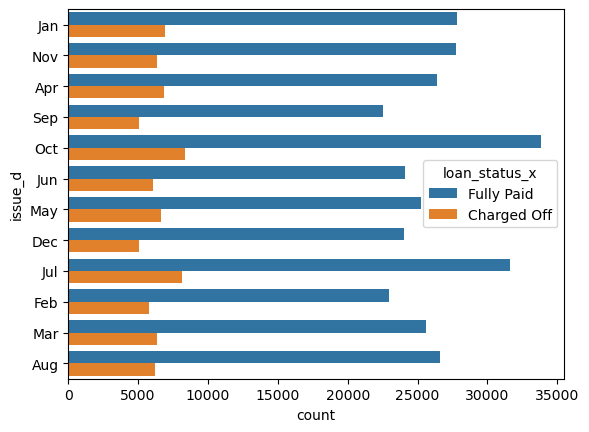

In [43]:
sns.countplot(data=cat_only, y='issue_d', hue='loan_status_x', orient='v')
plt.show()

In [44]:
for month in cat_only['issue_d'].unique().tolist():
    fully_paid_over_month = cat_only.loc[(cat_only['issue_d'] == month) &
                        (cat_only['loan_status_x'] == 'Fully Paid')]['title'].count()
    charged_off_over_month = cat_only.loc[(cat_only['issue_d'] == month) &
                        (cat_only['loan_status_x'] == 'Charged Off')]['title'].count()
    print(charged_off_over_month/fully_paid_over_month)

0.24813761831072084
0.2291373525273298
0.2586853570752036
0.22620316107263364
0.24619161712071463
0.25197308299410154
0.26281822860989035
0.20978410083614127
0.25661308695101887
0.2523201603415973
0.24771323586897037
0.2327573253193088


In [45]:
#not seeing a lot of variation here, so going to drop out issue_d
cat_only = cat_only.drop(columns='issue_d')

In [46]:
cat_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   emp_title            373103 non-null  object
 4   home_ownership       396030 non-null  object
 5   verification_status  396030 non-null  object
 6   loan_status_x        396030 non-null  object
 7   title                396030 non-null  object
 8   earliest_cr_line     396030 non-null  object
 9   initial_list_status  396030 non-null  object
 10  application_type     396030 non-null  object
 11  loan_status_y        396030 non-null  object
dtypes: object(12)
memory usage: 36.3+ MB


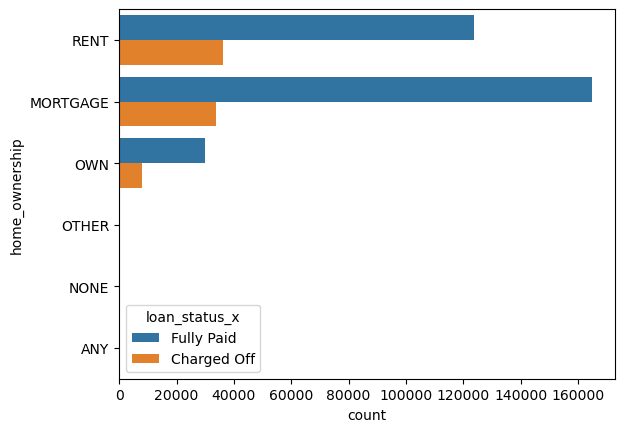

In [47]:
sns.countplot(data=cat_only, y='home_ownership', hue='loan_status_x', orient='v')
plt.show()

In [48]:
cat_only['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

Looks like Home ownership is a good feature to keep, might want to clean it a little bit? But not hugely necessary. 

In [49]:
cat_only['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

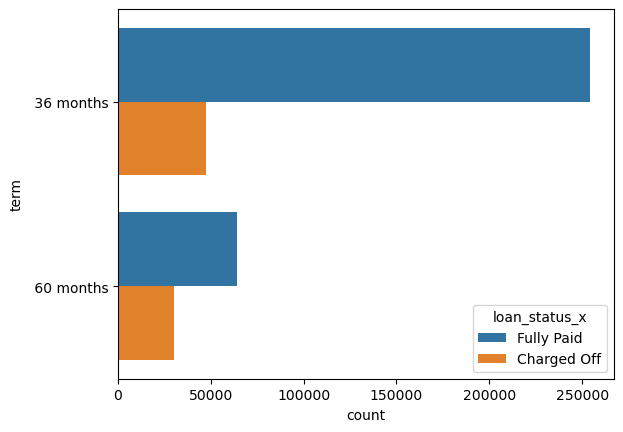

In [50]:
sns.countplot(data=cat_only, y='term', hue='loan_status_x', orient='v')
plt.show()

Term is another one that looks good from a feature engineering perspective. So we will keep this. 

In [51]:
cat_only.drop(columns='emp_title', inplace=True)

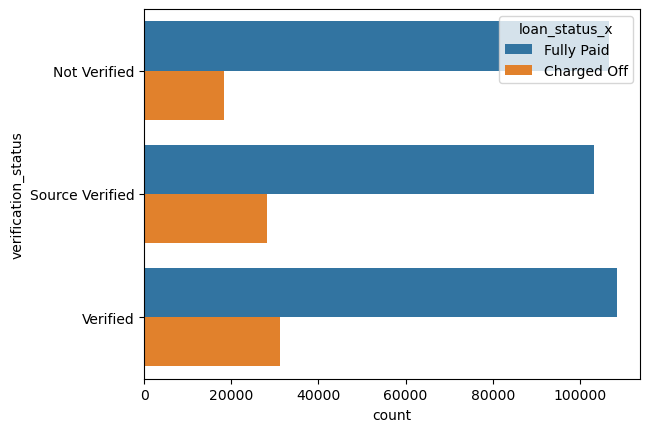

In [52]:
sns.countplot(data=cat_only, y='verification_status', hue='loan_status_x', orient='v')
plt.show()

In [53]:
for status in cat_only['verification_status'].unique().tolist():
    fully_paid_over_month = cat_only.loc[(cat_only['verification_status'] == status) &
                        (cat_only['loan_status_x'] == 'Fully Paid')]['verification_status'].count()
    charged_off_over_month = cat_only.loc[(cat_only['verification_status'] == status) &
                        (cat_only['loan_status_x'] == 'Charged Off')]['verification_status'].count()
    print(charged_off_over_month/fully_paid_over_month)

0.17145399203933506
0.27346831958593015
0.28735091457508927


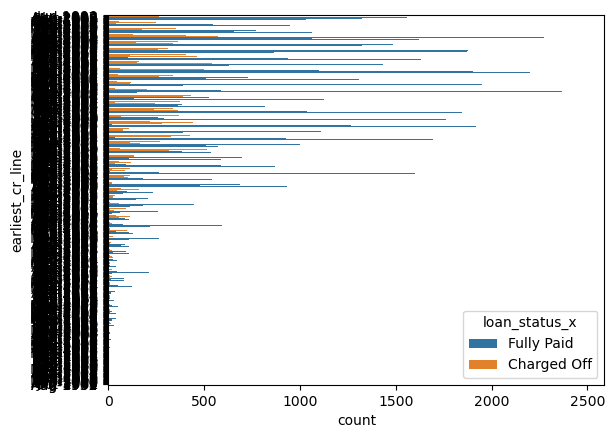

In [55]:
sns.countplot(data=cat_only, y='earliest_cr_line', hue='loan_status_x', orient='v')
plt.show()

In [149]:
#cat_only['earliest_cr_line'].value_counts()

In [55]:
cat_only['earliest_cr_line'] = cat_only['earliest_cr_line'].apply(lambda x: re.sub(r'\w{3}-\b','',x))

In [56]:
cat_only['initial_list_status'].value_counts()

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

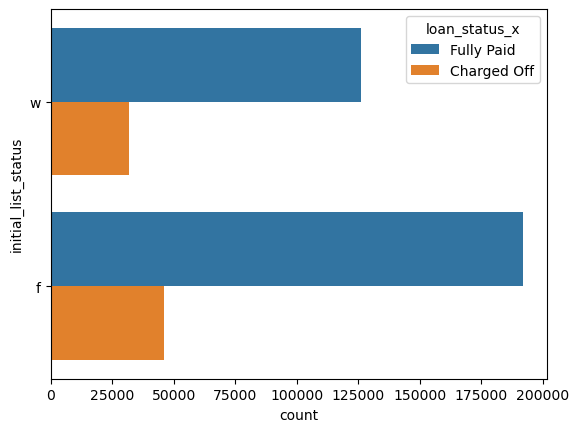

In [57]:
sns.countplot(data=cat_only, y='initial_list_status', hue='loan_status_x', orient='v')
plt.show()

In [58]:
fully_paid_over_month = cat_only.loc[(cat_only['initial_list_status'] == 'f') &
                        (cat_only['loan_status_x'] == 'Fully Paid')]['initial_list_status'].count()
charged_off_over_month = cat_only.loc[(cat_only['initial_list_status'] == 'f') &
                        (cat_only['loan_status_x'] == 'Charged Off')]['initial_list_status'].count()
print(charged_off_over_month/fully_paid_over_month)

0.23924936883475184


In [59]:
fully_paid_over_month = cat_only.loc[(cat_only['initial_list_status'] == 'w') &
                        (cat_only['loan_status_x'] == 'Fully Paid')]['initial_list_status'].count()
charged_off_over_month = cat_only.loc[(cat_only['initial_list_status'] == 'w') &
                        (cat_only['loan_status_x'] == 'Charged Off')]['initial_list_status'].count()
print(charged_off_over_month/fully_paid_over_month)

0.2511801793238919


In [60]:
#drop list status, does not seem to be that predictive

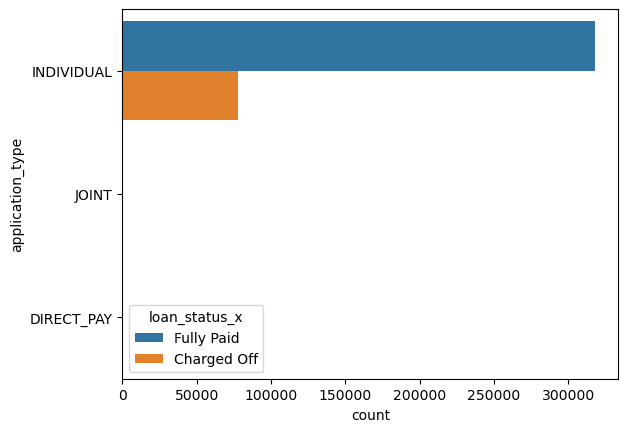

In [61]:
sns.countplot(data=cat_only, y='application_type', hue='loan_status_x', orient='v')
plt.show()

In [62]:
cat_only['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [63]:
cat_only.drop(columns=['application_type','initial_list_status'],inplace=True)

In [64]:
cat_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   home_ownership       396030 non-null  object
 4   verification_status  396030 non-null  object
 5   loan_status_x        396030 non-null  object
 6   title                396030 non-null  object
 7   earliest_cr_line     396030 non-null  object
 8   loan_status_y        396030 non-null  object
dtypes: object(9)
memory usage: 27.2+ MB


In [65]:
cat_only.drop(columns='loan_status_y', inplace=True)

In [66]:
cat_only['earliest_cr_line'] = cat_only['earliest_cr_line'].astype('int')

In [67]:
cat_only['new_earliest'] = 0
cat_only.loc[cat_only['earliest_cr_line'] <= 2000, 'new_earliest']=1

In [68]:
cat_only['earliest_cr_line'] = cat_only['earliest_cr_line'].astype('object')

In [69]:
cat_only.loc[cat_only['new_earliest'] == 1, 'earliest_cr_line']='<= 2000'

In [70]:
cat_only['earliest_cr_line'].value_counts()

earliest_cr_line
<= 2000    235491
2001        29083
2002        25901
2003        23657
2004        20914
2005        17401
2006        15119
2007        11313
2008         7098
2009         3874
2010         3156
2011         2133
2012          791
2013           99
Name: count, dtype: int64

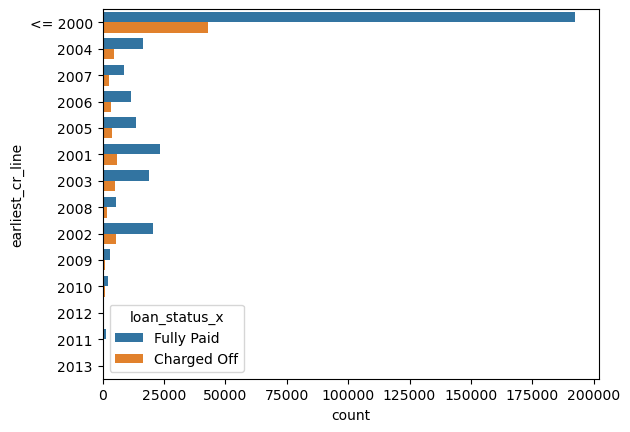

In [71]:
sns.countplot(data=cat_only, y='earliest_cr_line', hue='loan_status_x', orient='v')
plt.show()

In [72]:
cat_only.drop(columns='sub_grade', inplace=True)

In [73]:
cat_only_final = pd.get_dummies(data=cat_only, dtype='int')

In [74]:
cat_only_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   new_earliest                         396030 non-null  int64
 1   term_ 36 months                      396030 non-null  int32
 2   term_ 60 months                      396030 non-null  int32
 3   grade_A                              396030 non-null  int32
 4   grade_B                              396030 non-null  int32
 5   grade_C                              396030 non-null  int32
 6   grade_D                              396030 non-null  int32
 7   grade_E                              396030 non-null  int32
 8   grade_F                              396030 non-null  int32
 9   grade_G                              396030 non-null  int32
 10  home_ownership_ANY                   396030 non-null  int32
 11  home_ownership_MORTGAGE              39

In [75]:
cat_only_final.drop(columns='new_earliest', inplace=True)

##### Moving on to the quantitative data for EDA and cleaning. Going to make some box plots and do a point biserial correlation to see what variables are likely to matter so we can keep only the most relevant features for our model. 

In [76]:
quant_only = df.select_dtypes(['float64'])

In [77]:
quant_only = pd.DataFrame(quant_only)

In [78]:
quant_only = quant_only.merge(df[['loan_status']], how='left', left_index=True, right_index=True)

In [79]:
quant_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   annual_inc            396030 non-null  float64
 4   dti                   396030 non-null  float64
 5   open_acc              396030 non-null  float64
 6   pub_rec               396030 non-null  float64
 7   revol_bal             396030 non-null  float64
 8   revol_util            395754 non-null  float64
 9   total_acc             396030 non-null  float64
 10  mort_acc              358235 non-null  float64
 11  pub_rec_bankruptcies  395495 non-null  float64
 12  loan_status           396030 non-null  object 
dtypes: float64(12), object(1)
memory usage: 39.3+ MB


Making the Boxplots - Note, I did clean these columns further after making these plots. Some of the plots, like "DTI" had outliers so the boxplots looked bad. Consequently, I dropped the outliers (replacing them with the mean of the column not including the outliers), and then I re-ran this code. 

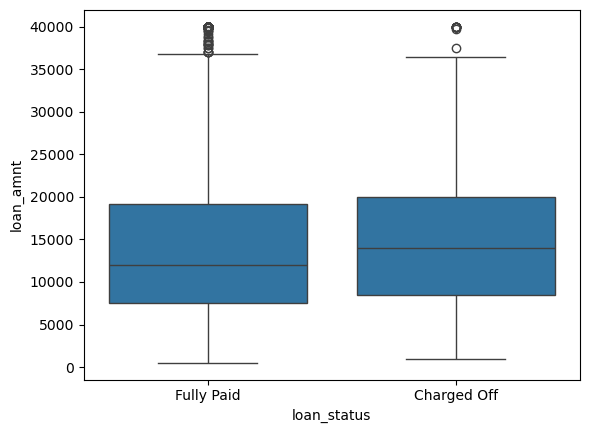

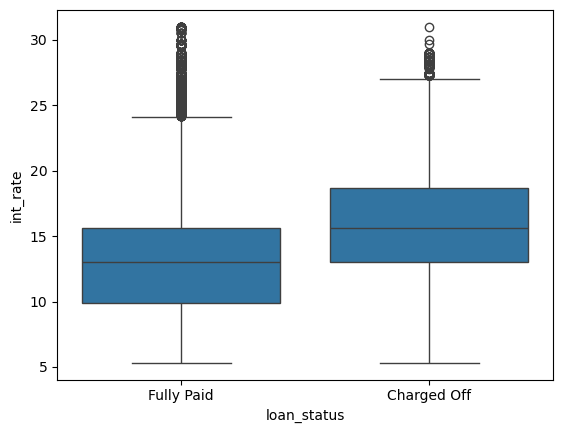

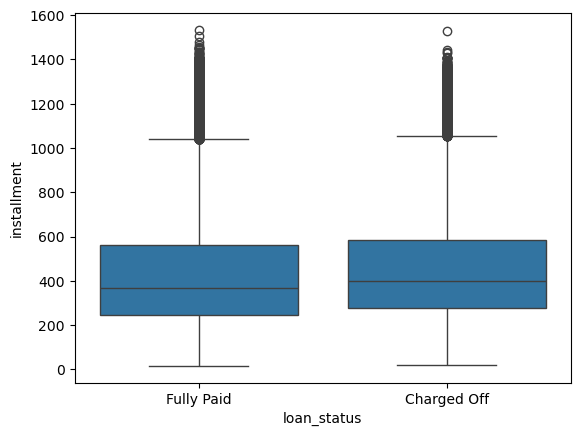

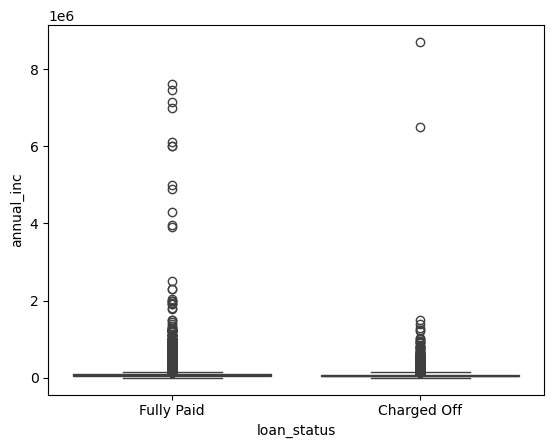

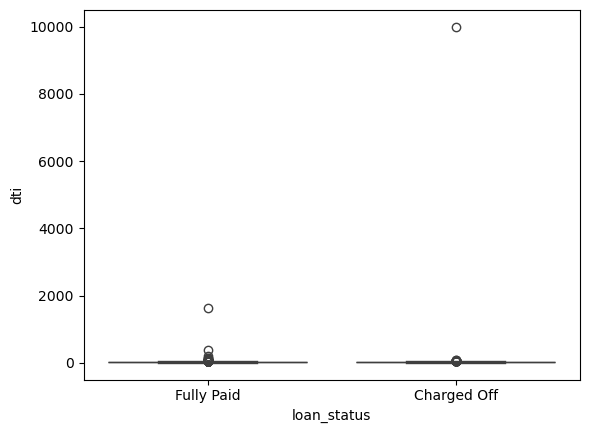

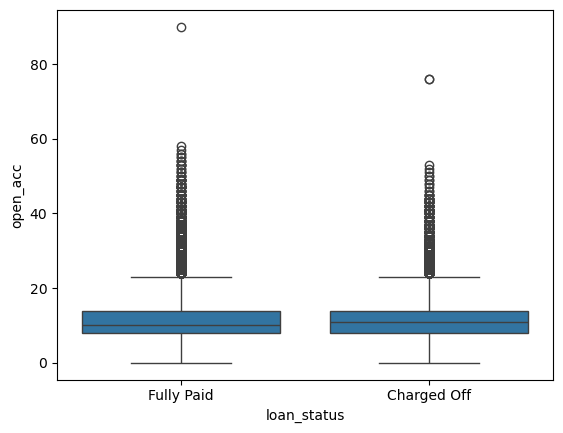

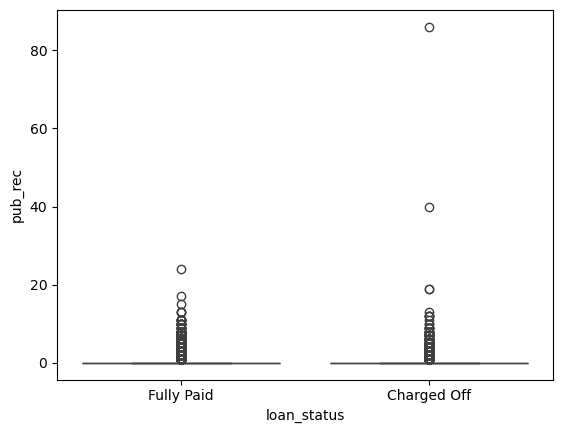

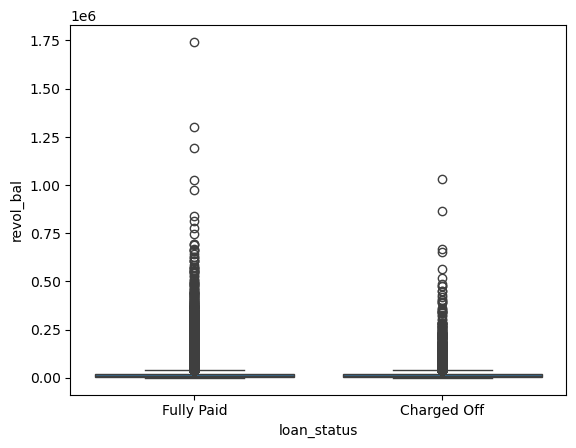

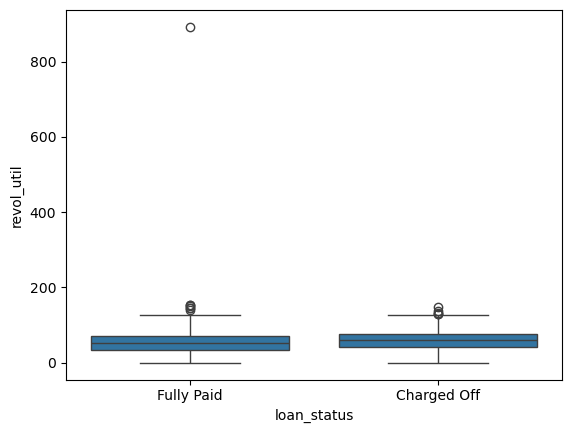

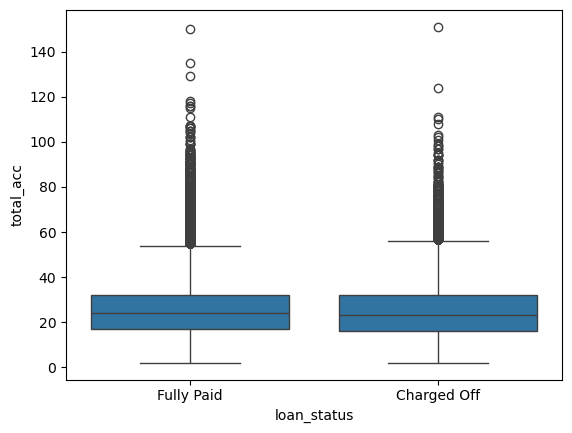

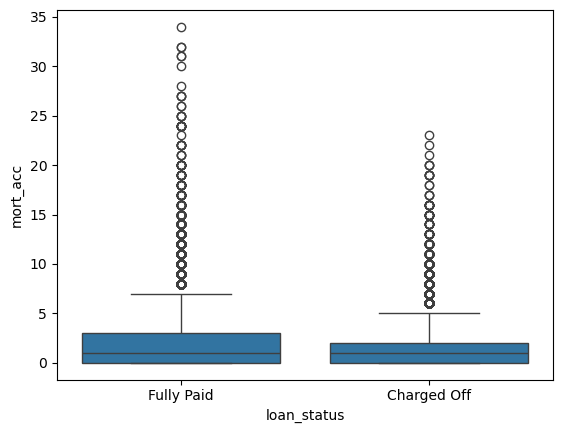

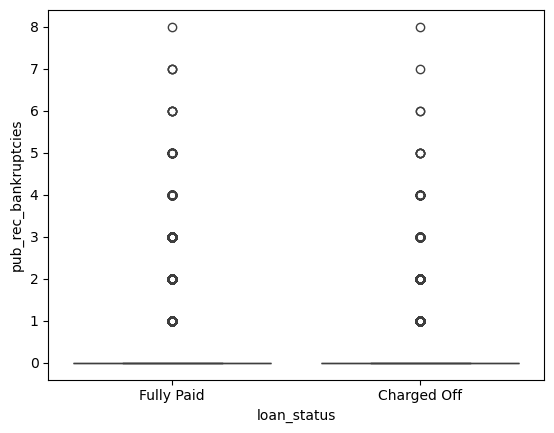

In [80]:
for column in quant_only.columns:
    if column != 'loan_status':
        sns.boxplot(data=quant_only, x='loan_status', y=column)
        plt.show()

In [81]:
from scipy import stats
fake = quant_only.dropna()
fake.loc[fake['loan_status'] == 'Fully Paid', 'loan_status']=1
fake.loc[fake['loan_status'] == 'Charged Off', 'loan_status']=0
fake['loan_status'] = fake['loan_status'].astype('int')
for column in quant_only.columns:
    binary = fake['loan_status']
    cont = fake[column]
    correlation, p_value = stats.pointbiserialr(binary, cont)
    print(column)
    print(f"Point-biserial correlation: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")

loan_amnt
Point-biserial correlation: -0.056
P-value: 0.000
int_rate
Point-biserial correlation: -0.248
P-value: 0.000
installment
Point-biserial correlation: -0.037
P-value: 0.000
annual_inc
Point-biserial correlation: 0.056
P-value: 0.000
dti
Point-biserial correlation: -0.061
P-value: 0.000
open_acc
Point-biserial correlation: -0.026
P-value: 0.000
pub_rec
Point-biserial correlation: -0.016
P-value: 0.000
revol_bal
Point-biserial correlation: 0.013
P-value: 0.000
revol_util
Point-biserial correlation: -0.079
P-value: 0.000
total_acc
Point-biserial correlation: 0.021
P-value: 0.000
mort_acc
Point-biserial correlation: 0.073
P-value: 0.000
pub_rec_bankruptcies
Point-biserial correlation: -0.004
P-value: 0.009
loan_status
Point-biserial correlation: 1.000
P-value: 0.000


C:\Users\danie\AppData\Local\Temp\ipykernel_24572\2444186898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['loan_status'] = fake['loan_status'].astype('int')


In [82]:
mean_without_outliers = quant_only.loc[quant_only['dti'] <100]['dti'].mean()
print(mean_without_outliers)

17.347787420900858


In [83]:
quant_only.loc[quant_only['dti'] > 100, 'dti']=mean_without_outliers

In [84]:
revol_util_mean_wo_outliers = quant_only.loc[quant_only['revol_util']<800]['revol_util'].mean()
print(revol_util_mean_wo_outliers)

53.78962987014628


In [85]:
quant_only.loc[quant_only['revol_util']>800, 'revol_util']=revol_util_mean_wo_outliers

In [86]:
quant_only['revol_util'] = quant_only['revol_util'].fillna(revol_util_mean_wo_outliers)

In [87]:
quant_only['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

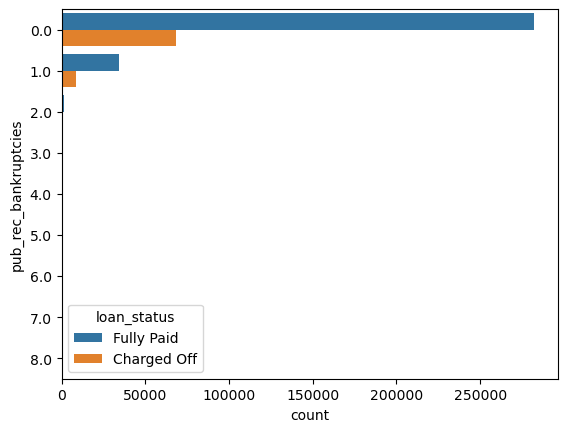

In [88]:
sns.countplot(data=quant_only, y='pub_rec_bankruptcies', hue='loan_status', orient='v')
plt.show()

In [89]:
quant_only.drop(columns=['annual_inc','pub_rec','total_acc','mort_acc','pub_rec_bankruptcies'],inplace=True)

In [90]:
quant_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_amnt    396030 non-null  float64
 1   int_rate     396030 non-null  float64
 2   installment  396030 non-null  float64
 3   dti          396030 non-null  float64
 4   open_acc     396030 non-null  float64
 5   revol_bal    396030 non-null  float64
 6   revol_util   396030 non-null  float64
 7   loan_status  396030 non-null  object 
dtypes: float64(7), object(1)
memory usage: 24.2+ MB


In [91]:
quant_only.loc[quant_only['loan_status'] == 'Fully Paid', 'loan_status']=1
quant_only.loc[quant_only['loan_status'] == 'Charged Off', 'loan_status']=0

In [92]:
quant_only['loan_status'] = quant_only['loan_status'].astype('int')

In [93]:
cat_only_final.drop(columns=['loan_status_x_Fully Paid','loan_status_x_Charged Off'], inplace=True)

In [94]:
final_data = quant_only.merge(cat_only_final, how='left', left_index=True, right_index=True)

In [95]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   dti                                  396030 non-null  float64
 4   open_acc                             396030 non-null  float64
 5   revol_bal                            396030 non-null  float64
 6   revol_util                           396030 non-null  float64
 7   loan_status                          396030 non-null  int32  
 8   term_ 36 months                      396030 non-null  int32  
 9   term_ 60 months                      396030 non-null  int32  
 10  grade_A                              396030 non-null  int32  
 11  grade_B      

##### Now to start trying to see if any cleaning I did worked or if the model ends up being terrible (probably the latter)

The model was initially pretty bad, which I confirmed by running a random forest classifier and got a similarly bad result. So, that told me my data was not great. Ultimately, after being more careful with inclusion of my quantitative data, I narrowed down the problem to the fact that the target class was imbalanced. I then tried random under sampling the majority class, which did not return great results. Next, I used SMOTE to over sample from my minority class. This produced results that were a lot better based on my model metrics (both in the neural network and in the random forest classifier). 

In [125]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [97]:
final_data.drop(columns=['earliest_cr_line_2001',
                         'earliest_cr_line_2002',
                         'earliest_cr_line_2003',
                         'earliest_cr_line_2004',
                         'earliest_cr_line_2005', 
                         'earliest_cr_line_2006', 
                         'earliest_cr_line_2007', 
                         'earliest_cr_line_2008',
                         'earliest_cr_line_2009',
                         'earliest_cr_line_2010',
                         'earliest_cr_line_2011',
                         'earliest_cr_line_2012',
                         'earliest_cr_line_2013',
                         'earliest_cr_line_<= 2000'], axis=1, inplace=True)

In [98]:
final_data.drop(columns=['home_ownership_ANY','home_ownership_NONE','home_ownership_OTHER'],inplace=True)

In [101]:
X = final_data.drop(columns='loan_status')
y = final_data[['loan_status']]

In [102]:
rus = RandomUnderSampler(random_state=42)

In [126]:
smo = SMOTE(random_state=42)

In [127]:
x_res, y_res = smo.fit_resample(X, y)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = .3, random_state=42)

Scaling the dataset as that is a best practice prior to fitting our model. 

In [129]:
scaler = MinMaxScaler()

In [130]:
scaler.fit(x_train)

MinMaxScaler()

In [131]:
x_train = scaler.transform(x_train)

In [132]:
x_test = scaler.transform(x_test)

In [150]:
model = Sequential()

model.add(Dense(28, activation='relu')) #24
model.add(Dropout(rate=0.2)) #20% the neurons for each batch (one epoch here), will be turned off
model.add(Dense(14, activation='relu')) #12
model.add(Dropout(rate=0.5)) #half the neurons for each batch (one epoch here), will be turned off
model.add(Dense(7, activation='relu'))
model.add(Dropout(rate=0.5)) #half the neurons for each batch (one epoch here), will be turned off

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [151]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [152]:
model.fit(x=x_train, y=y_train, epochs=600, batch_size = 256, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5209 - val_loss: 0.3022
Epoch 2/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3494 - val_loss: 0.3006
Epoch 3/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3445 - val_loss: 0.2987
Epoch 4/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3442 - val_loss: 0.2987
Epoch 5/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3419 - val_loss: 0.2981
Epoch 6/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3432 - val_loss: 0.2986
Epoch 7/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3405 - val_loss: 0.2993
Epoch 8/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3407 - val_loss: 0.2983
Epoch 9/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3395 - val_loss: 0.2976
Epoch 10/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3401 - val_loss: 0.2979
Epoch 11/600
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3421 - val_loss: 0.2978
Epoch 12/600
1742/1

In [153]:
loss = pd.DataFrame(model.history.history)

<Axes: >

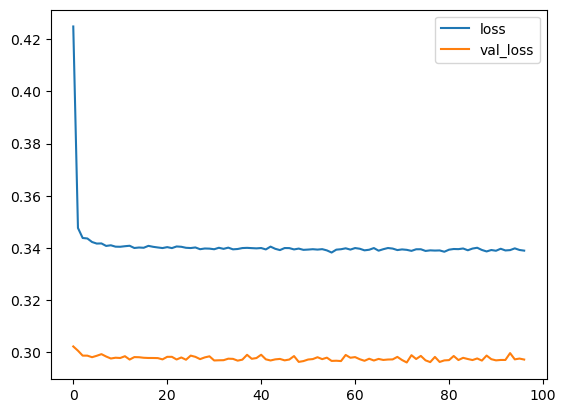

In [154]:
loss.plot()

In [155]:
y_pred = model.predict(x_test)

5970/5970 ━━━━━━━━━━━━━━━━━━━━ 4s 606us/step


In [156]:
print(y_pred)

[[0.90551925]
 [0.8639961 ]
 [0.7368082 ]
 ...
 [0.7320162 ]
 [0.        ]
 [0.        ]]


In [157]:
y_pred = (y_pred > .5).astype(int)

In [158]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     95751
           1       0.79      1.00      0.88     95264

    accuracy                           0.87    191015
   macro avg       0.90      0.87      0.87    191015
weighted avg       0.90      0.87      0.87    191015



I think this is an acceptable score overall. Our recall score for the positive cases, our "paid off" people, is very good. This tells me that the model does not often have false negatives (predicting something was negative when it was in reality positive). However, if we were doing this for real, we'd probably strive for better precision in the "1" case, because that means we have a fair amount of false positives, and I don't want the model to say someone is going to pay their loan back when they actually end up not paying their loan back. 

### Testing a random forest classifier to see how that handles our dataset
I did this to better understand if my initial poor performance from the neural network was to do with issues in the neural network, or issues with the data. So, if I had good performance here, but poor performance with the neural network, then I could reasonbly conclude that the issue was the neural network and not the underlying data. 

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
clf = RandomForestClassifier()

In [136]:
clf.fit(x_train, y_train)

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [137]:
y_pred_clf = clf.predict(x_test)

In [138]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     95751
           1       0.82      0.96      0.88     95264

    accuracy                           0.87    191015
   macro avg       0.88      0.87      0.87    191015
weighted avg       0.88      0.87      0.87    191015

